In [1]:
#importing necessary libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk


In [3]:
# loading data

In [4]:
data = pd.read_csv('/labeledTrainData.tsv', sep = "\t")

In [5]:
data.head()

,id,sentiment,review
0,5814_8,1,With all this stuff going down at the moment w...
1,2381_9,1,"\The Classic War of the Worlds\"" by Timothy Hi..."
2,7759_3,0,The film starts with a manager (Nicholas Bell)...
3,3630_4,0,It must be assumed that those who praised this...
4,9495_8,1,Superbly trashy and wondrously unpretentious 8...


In [6]:
data.shape

(25000, 3)

In [7]:
data.dtypes

id           object
sentiment     int64
review       object
dtype: object

In [8]:
data.describe()

,sentiment
count,25000.00000
mean,0.50000
std,0.50001
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [10]:
# checking for missing values

In [9]:
data.isna().sum()

id           0
sentiment    0
review       0
dtype: int64

In [11]:
data['sentiment'].value_counts()

1    12500
0    12500
Name: sentiment, dtype: int64

In [12]:
# checking for duplicated rows

In [13]:
data.duplicated().sum()

0

In [14]:
data['review']

0        With all this stuff going down at the moment w...
1        \The Classic War of the Worlds\" by Timothy Hi...
2        The film starts with a manager (Nicholas Bell)...
3        It must be assumed that those who praised this...
4        Superbly trashy and wondrously unpretentious 8...
                               ...                        
24995    It seems like more consideration has gone into...
24996    I don't believe they made this film. Completel...
24997    Guy is a loser. Can't get girls, needs to buil...
24998    This 30 minute documentary Buñuel made in the ...
24999    I saw this movie as a child and it broke my he...
Name: review, Length: 25000, dtype: object

In [16]:
# text preprocessing

In [17]:
import string
import re

In [18]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', raw_text)
    return cleaned_text

data['review'] = data['review'].apply(remove_tags)

In [19]:
data['review'][1]

'\\The Classic War of the Worlds\\" by Timothy Hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate H. G. Wells\' classic book. Mr. Hines succeeds in doing so. I, and those who watched his film with me, appreciated the fact that it was not the standard, predictable Hollywood fare that comes out every year, e.g. the Spielberg version with Tom Cruise that had only the slightest resemblance to the book. Obviously, everyone looks for different things in a movie. Those who envision themselves as amateur \\"critics\\" look only to criticize everything they can. Others rate a movie on more important bases,like being entertained, which is why most people never agree with the \\"critics\\". We enjoyed the effort Mr. Hines put into being faithful to H.G. Wells\' classic novel, and we found it to be very entertaining. This made it easy to overlook what the \\"critics\\" perceive to be its shortcomings."'

In [20]:
data['review'] = data['review'].apply(lambda x:x.lower())

In [21]:
#remove puctuations

In [22]:
PUNCT_TO_REMOVE = string.punctuation
def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))


data['review'] = data['review'].apply(lambda text: remove_punctuation(text))

In [26]:
data['review'][1]

'the classic war of the worlds by timothy hines is a very entertaining film that obviously goes to great effort and lengths to faithfully recreate h g wells classic book mr hines succeeds in doing so i and those who watched his film with me appreciated the fact that it was not the standard predictable hollywood fare that comes out every year eg the spielberg version with tom cruise that had only the slightest resemblance to the book obviously everyone looks for different things in a movie those who envision themselves as amateur critics look only to criticize everything they can others rate a movie on more important baseslike being entertained which is why most people never agree with the critics we enjoyed the effort mr hines put into being faithful to hg wells classic novel and we found it to be very entertaining this made it easy to overlook what the critics perceive to be its shortcomings'

In [30]:
#remove stopwords

In [47]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
  output = [i for i in text if i not in stopwords]
  return output

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [43]:
data['review'][1]

'classic\xa0war\xa0worlds\xa0timothy\xa0hines\xa0entertaining\xa0film\xa0obviously\xa0goes\xa0great\xa0effort\xa0lengths\xa0faithfully\xa0recreate\xa0h\xa0g\xa0wells\xa0classic\xa0book\xa0mr\xa0hines\xa0succeeds\xa0watched\xa0film\xa0appreciated\xa0fact\xa0standard\xa0predictable\xa0hollywood\xa0fare\xa0comes\xa0every\xa0year\xa0eg\xa0spielberg\xa0version\xa0tom\xa0cruise\xa0slightest\xa0resemblance\xa0book\xa0obviously\xa0everyone\xa0looks\xa0different\xa0things\xa0movie\xa0envision\xa0amateur\xa0critics\xa0look\xa0criticize\xa0everything\xa0others\xa0rate\xa0movie\xa0important\xa0baseslike\xa0entertained\xa0people\xa0never\xa0agree\xa0critics\xa0enjoyed\xa0effort\xa0mr\xa0hines\xa0put\xa0faithful\xa0hg\xa0wells\xa0classic\xa0novel\xa0found\xa0entertaining\xa0made\xa0easy\xa0overlook\xa0critics\xa0perceive\xa0shortcomings'

In [38]:
 # Tokenize the given text into words

In [39]:
nltk.download('punkt')
def tokenization(text):
  words = nltk.word_tokenize(text)
  return words

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [40]:
  # Lemmatize each word in the given text


In [41]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
wordnet_lemm = WordNetLemmatizer()
def lemm(text):
  lemm_text = [wordnet_lemm.lemmatize(word) for word in text]
  return lemm_text


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [42]:
data['review']

0        stuff going moment mj ive started listening mu...
1        classic war worlds timothy hines entertaining ...
2        film starts manager nicholas bell giving welco...
3        must assumed praised film greatest filmed oper...
4        superbly trashy wondrously unpretentious 80s e...
                               ...                        
24995    seems like consideration gone imdb reviews fil...
24996    dont believe made film completely unnecessary ...
24997    guy loser cant get girls needs build picked st...
24998    30 minute documentary buñuel made early 1930s ...
24999    saw movie child broke heart story unfinished e...
Name: review, Length: 25000, dtype: object

In [48]:
# Preprocess the given data column

def preprocess(data_col):
  corpus = []
  for item in data_col:
    new_item = remove_punctuation(item)
    new_item = new_item.lower()
    new_item = tokenization(new_item)
    new_tem = remove_stopwords(new_item)
    new_item = lemm(new_item)
    corpus.append(' '.join(str(x) for x in new_item))
  return corpus

In [49]:
corpus = preprocess(data['review'])

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train, x_test, y_train, y_test = train_test_split(corpus, data['sentiment'], test_size=0.2, random_state=42)


In [52]:
# bag of words


In [53]:
# Extracting Features
# Transform training and test data into feature vectors

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(1,2))
train_vectors = cv.fit_transform(x_train)
test_vectors =cv.transform(x_test)
x = train_vectors
y = y_train

In [54]:
#random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x,y)

RandomForestClassifier()

In [58]:
y_pred = rf.predict(test_vectors)


In [56]:
from sklearn.metrics import accuracy_score, classification_report

In [59]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.86


In [60]:
# logistic regression


In [61]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x, y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
y_pred1 = lr.predict(test_vectors)

accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.89


In [63]:
# xgboost

In [64]:
import xgboost as xgb
xgb = xgb.XGBClassifier(n_estimators = 100,max_depth=4,random_state=42)
xgb.fit(x,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [65]:
y_pred2 = xgb.predict(test_vectors)
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.85


In [66]:
# svm

In [67]:
from sklearn.svm import SVC
svm = SVC(kernel='poly')
svm.fit(x,y)

SVC(kernel='poly')

In [68]:
y_pred3 = svm.predict(test_vectors)
accuracy = accuracy_score(y_test, y_pred3)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.73


In [71]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      2481
           1       0.88      0.90      0.89      2519

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



In [72]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      2481
           1       0.83      0.88      0.85      2519

    accuracy                           0.85      5000
   macro avg       0.85      0.85      0.85      5000
weighted avg       0.85      0.85      0.85      5000



In [73]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.66      0.92      0.77      2481
           1       0.87      0.54      0.67      2519

    accuracy                           0.73      5000
   macro avg       0.77      0.73      0.72      5000
weighted avg       0.77      0.73      0.72      5000



In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.84      0.85      2481
           1       0.85      0.87      0.86      2519

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



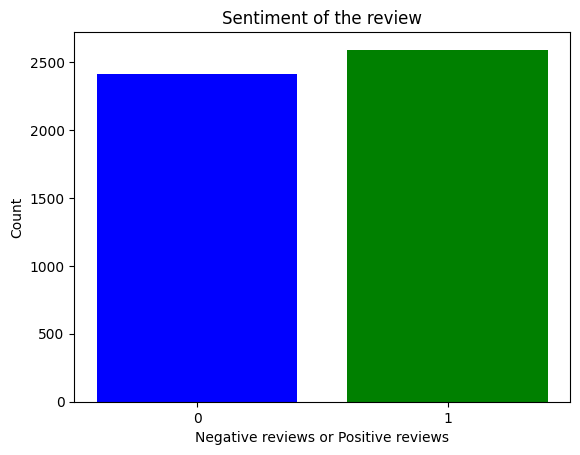

In [70]:
# Calculate the counts of 0s and 1s
unique, counts = np.unique(y_pred, return_counts=True)
counts_dict = dict(zip(unique, counts))
# Define colors for each class
colors = ['blue', 'green']

# Create a bar graph
plt.bar(counts_dict.keys(), counts_dict.values(), color=colors)
plt.xlabel('Negative reviews or Positive reviews')
plt.ylabel('Count')
plt.xticks(list(counts_dict.keys()))
plt.title('Sentiment of the review')
plt.show()